In [137]:
import pandas as pd

df_final_demo = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt')
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [138]:
df_final_demo.isna().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [139]:
df_final_demo[df_final_demo.isnull().any(axis=1)]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
# Drop all the 15 rows with null values
#df_final_demo = df_final_demo.dropna()
df_final_demo = df_final_demo.dropna(subset=["clnt_tenure_yr"]) #if required the row 9583  !!!!!!!!!!!!!!!!!

df_final_demo[df_final_demo.isnull().any(axis=1)]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0


In [141]:
df_final_demo.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [142]:
# Change floats to integers???

df_final_demo = df_final_demo.astype({
    "clnt_tenure_yr": "int",
    "clnt_tenure_mnth": "int",
    #"clnt_age": "int", not possible with null values
    "gendr": "object",
    "num_accts": "int",
    "calls_6_mnth": "int",
    "logons_6_mnth": "int"
})
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60.5,U,2,45105.30,6,9
1,2304905,7,94,58.0,U,2,110860.30,6,9
2,1439522,5,64,32.0,U,2,52467.79,6,9
3,1562045,16,198,49.0,M,2,67454.65,3,6
4,5126305,12,145,33.0,F,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38.5,U,3,1411062.68,5,5
70605,8981690,12,148,31.0,M,2,101867.07,6,6
70606,333913,16,198,61.5,F,2,40745.00,3,3
70607,1573142,21,255,68.0,M,3,475114.69,4,4


In [143]:
# Update with more understandale names
df_final_demo.columns = ["client_id", "client_tenure_years", "client_tenure_months", "client_age", "gender", "num_accounts", "balance", "calls_last_6_months", "logins_last_6_months"]
df_final_demo

,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logins_last_6_months
0,836976,6,73,60.5,U,2,45105.30,6,9
1,2304905,7,94,58.0,U,2,110860.30,6,9
2,1439522,5,64,32.0,U,2,52467.79,6,9
3,1562045,16,198,49.0,M,2,67454.65,3,6
4,5126305,12,145,33.0,F,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38.5,U,3,1411062.68,5,5
70605,8981690,12,148,31.0,M,2,101867.07,6,6
70606,333913,16,198,61.5,F,2,40745.00,3,3
70607,1573142,21,255,68.0,M,3,475114.69,4,4


In [144]:
print(df_final_demo.columns)


Index(['client_id', 'client_tenure_years', 'client_tenure_months',
       'client_age', 'gender', 'num_accounts', 'balance',
       'calls_last_6_months', 'logins_last_6_months'],
      dtype='object')


In [ ]:
def categorize_age(age):
    if age > 60:
        return "Above 60"
    elif 30 < age <= 60:
        return "Between 30 and 60"
    else:
        return "Below 30"

age_counts = df_final_demo.groupby(df_final_demo["client_age"].apply(categorize_age))["client_id"].count()
print(age_counts)

# PENDING CREATE NEW COLUMN WITH THIS age_counts DATA!!!

client_age
Above 60             15501
Below 30             14025
Between 30 and 60    41069
Name: client_id, dtype: int64


<Axes: xlabel='client_age'>

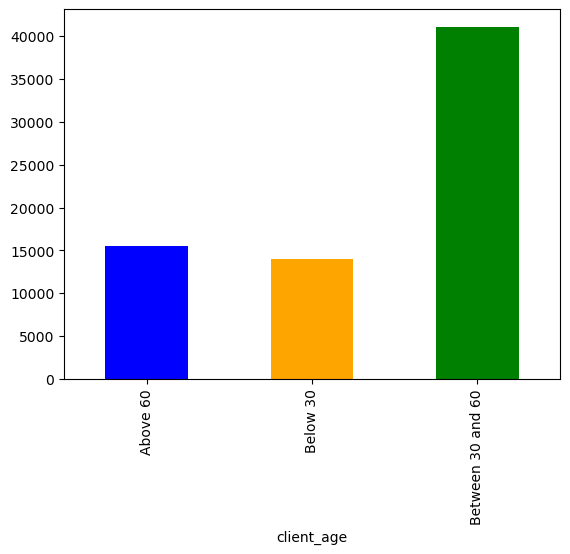

In [146]:
age_counts.plot(kind="bar", color=["blue", "orange", "green"])

In [147]:
df_final_demo["client_tenure_years"].unique()

array([ 6,  7,  5, 16, 12, 30, 15,  8,  4,  3, 10, 11, 13, 14, 19, 18, 25,
       23, 21, 17,  9, 27, 24, 20, 28, 22, 29, 46, 26, 32, 33, 35,  2, 38,
       31, 48, 34, 36, 51, 47, 49, 37, 39, 40, 55, 42, 44, 43, 50, 54, 41,
       45, 52, 62])

In [ ]:
def categorize_tenure_years(tenure):
    if tenure > 20:
        return "Above 20"
    elif 10 < tenure <= 20:
        return "Between 10 and 20"
    else:
        return "Below 10"

tenure_counts = df_final_demo.groupby(df_final_demo["client_tenure_years"].apply(categorize_tenure_years))["client_tenure_years"].count()
print(tenure_counts)

# PENDING CREATE NEW COLUMN WITH THIS tenure_counts DATA!!!

client_tenure_years
Above 20              9805
Below 10             34396
Between 10 and 20    26394
Name: client_tenure_years, dtype: int64


<Axes: xlabel='client_tenure_years'>

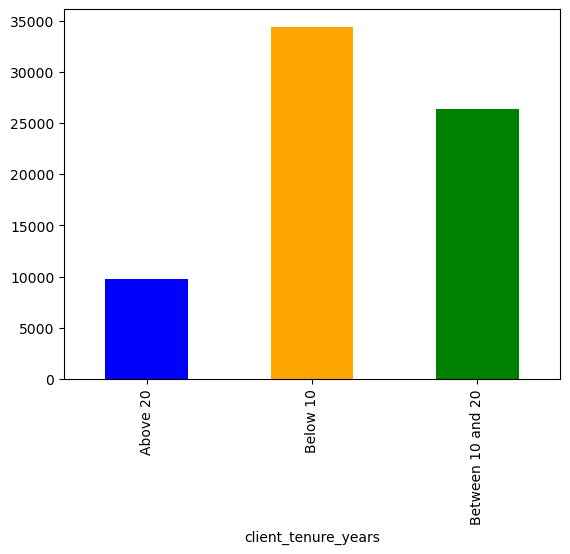

In [149]:
tenure_counts.plot(kind="bar", color=["blue", "orange", "green"])

In [150]:
df_final_web_1 = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt')
df_final_web_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [151]:
df_final_web_2 = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt')
df_final_web_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [152]:
df_final_experiment = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt')
df_final_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [153]:
df_final_experiment.isna().sum()

client_id        0
Variation    20109
dtype: int64

In [154]:
df_final_experiment["Variation"].value_counts()

Variation
Test       26968
Control    23532
Name: count, dtype: int64

In [155]:
df_final_experiment["client_id"].duplicated().any()

False

In [156]:
df_final_experiment.dtypes

client_id     int64
Variation    object
dtype: object